# Matplotlib

Visualisieren von Daten

Verschiedene Plots:
- Liniendiagramm
- Balkendiagramm
- Tortendiagramm
- ...

https://matplotlib.org/stable/plot_types/index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # WICHTIG: pyplot (Unterpaket) importieren

In [10]:
data = pd.read_csv("Data/AmazonStock.csv", parse_dates=True, index_col="Date")

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-25,12.929000,12.971500,12.725000,12.801000,12.801000,50278000
2013-03-26,12.852500,13.074000,12.814000,13.015500,13.015500,48420000
2013-03-27,12.937500,13.296500,12.895000,13.265000,13.265000,57498000
2013-03-28,13.291000,13.369000,13.203000,13.324500,13.324500,49474000
2013-04-01,13.349000,13.370000,13.050500,13.080500,13.080500,50496000
...,...,...,...,...,...,...
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400


## Plotten über Pandas selbst

<Axes: >

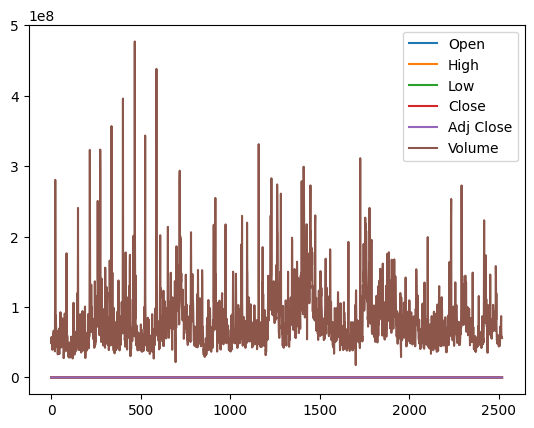

In [4]:
data.plot()

<Axes: >

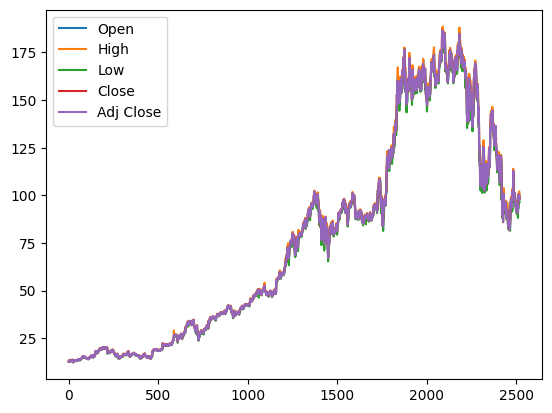

In [6]:
data.drop(columns=["Volume"]).plot()

<Axes: xlabel='Date'>

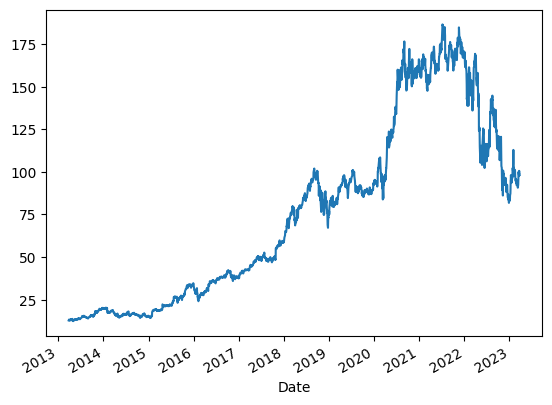

In [12]:
data["Close"].plot()

## Plotten über matplotlib

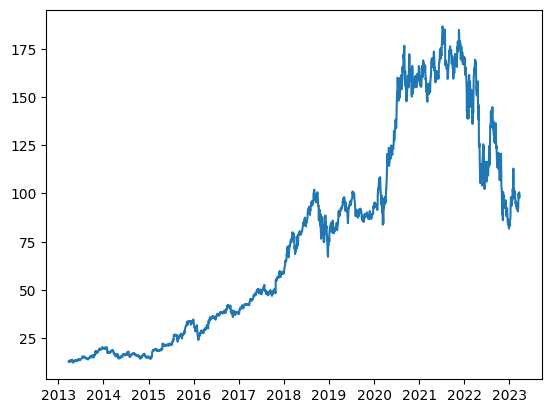

In [13]:
plt.plot(data["Close"])

<BarContainer object of 2519 artists>

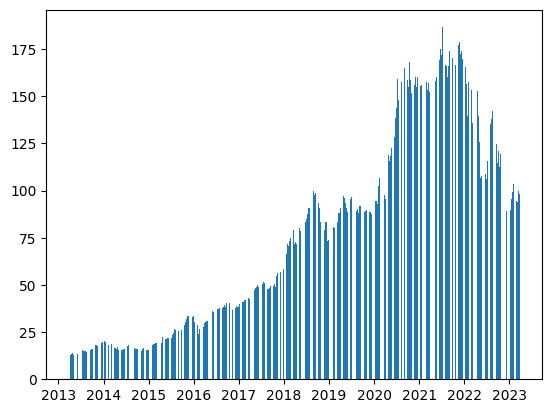

In [15]:
plt.bar(data.index, data["Close"])

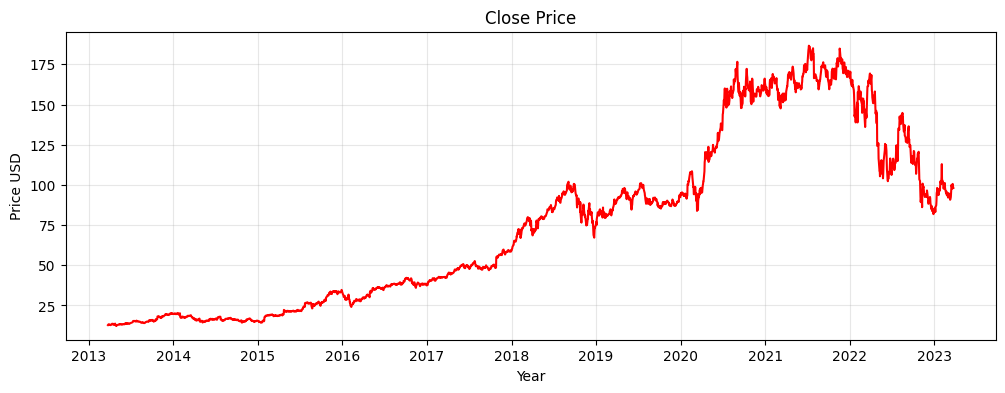

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(data["Close"], color="red")
plt.title("Close Price")
plt.xlabel("Year")
plt.ylabel("Price USD")
plt.grid(alpha=0.3)
plt.show()  # show: Plot abschließen/zeichnen

## Globale Graphen vs. Objektorientierte Graphen

Bei den globalen Graphen werden einfach Befehle ausgeführt, am Ende wird die Konfiguration mit plt.show() abgeschlossen

Bei den objektorientierten Graphen wird das Graph (figure) selbst angreifbar, und wir können diese separat konfigurieren

Text(0.5, 1.0, 'Linie 4')

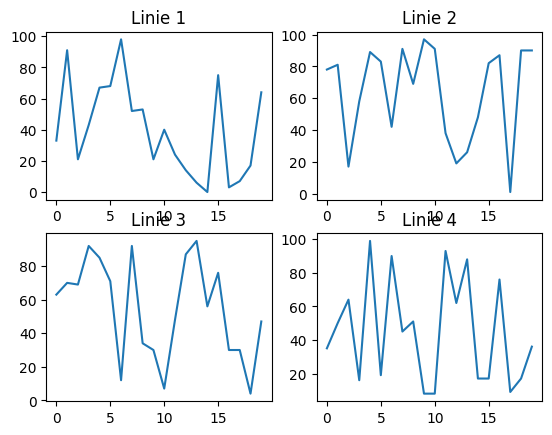

In [45]:
figure, ((a1_1, a1_2), (a2_1, a2_2)) = plt.subplots(2, 2)
a1_1.plot(np.random.randint(100, size=(20)))
a1_1.set_title("Linie 1")

a1_2.plot(np.random.randint(100, size=(20)))
a1_2.set_title("Linie 2")

a2_1.plot(np.random.randint(100, size=(20)))
a2_1.set_title("Linie 3")

a2_2.plot(np.random.randint(100, size=(20)))
a2_2.set_title("Linie 4")

## Balkendiagramm

Benötigt zwei Parameter:
- X-Achse: Datenpunkte
- Y-Achse: Werte

In [46]:
pop = pd.read_csv("Data/PopulationDataFertig.csv")

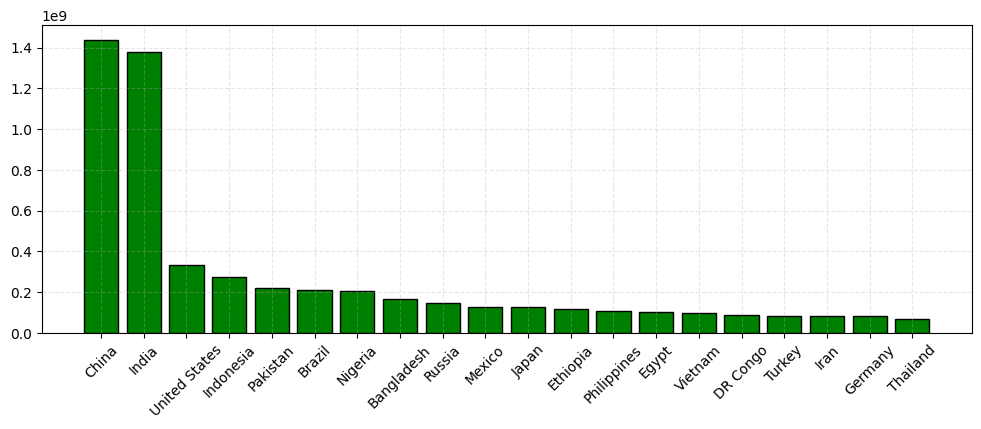

In [61]:
countries = pop.iloc[:20]
plt.figure(figsize=(12, 4))
plt.bar(countries["Country"], countries["Pop"], color="green", edgecolor="black")
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle="--")

None  # None am Ende der Zelle, um den Rückgabewert der Zelle nicht anzuzeigen

C:\Users\lk3\AppData\Local\Temp\ipykernel_12892\2374354075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries.sort_values("Pop", ascending=True, inplace=True)


<BarContainer object of 20 artists>

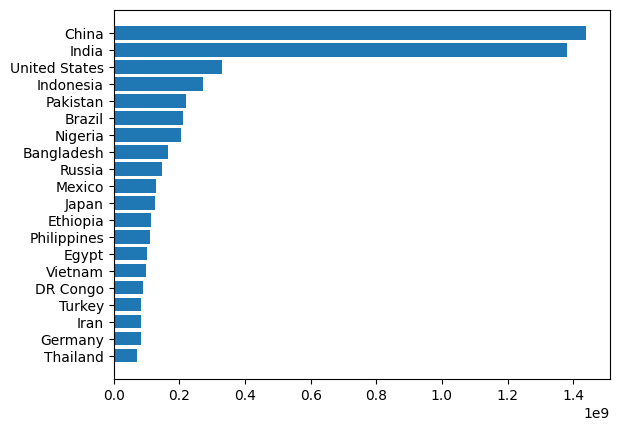

In [65]:
countries.sort_values("Pop", ascending=True, inplace=True)
plt.barh(countries["Country"], countries["Pop"])

## Histogramm

Verteilungsdiagramm

Beispiel: Bell Curve

Benötigt zwei Parameter:
- Die Datenpunkte als Zahlen
- Menge an Bins

In [77]:
x = np.random.randint(100, size=(100))

In [78]:
x

array([20, 73, 76, 71, 79, 67, 55, 61,  2, 19,  4, 25, 80, 44,  9, 24, 77,
       44, 20, 85, 20,  1,  6, 77, 58, 42, 90,  8, 88, 31, 75, 34, 37, 87,
       69, 89,  5, 56, 83, 18, 32, 63, 77, 21, 86, 76, 21, 56, 36, 59, 78,
       81, 53, 45, 76, 96, 69, 75, 73, 64, 31, 89, 10, 13, 41, 88, 12, 30,
       23, 71, 11, 53, 13, 10,  8,  9,  2, 94, 96, 38, 46, 47, 80, 36, 17,
       95,  6, 90, 45, 58, 19, 86, 25, 18, 55, 77,  4, 98, 16, 45])

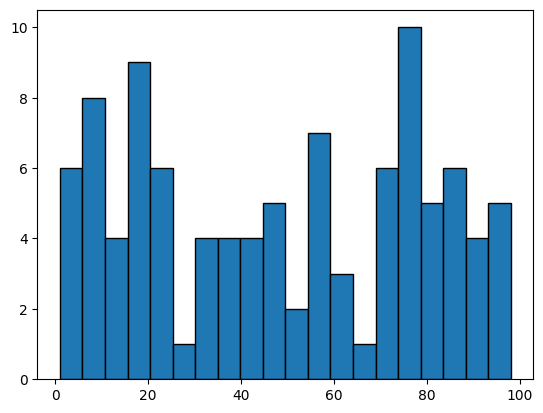

In [83]:
plt.hist(x, bins=20, edgecolor="black")
None

## Tortendiagramm

Kreisdiagramm

Zeigt Anteile einer gesamten Menge an

Benötigt die X-Werte

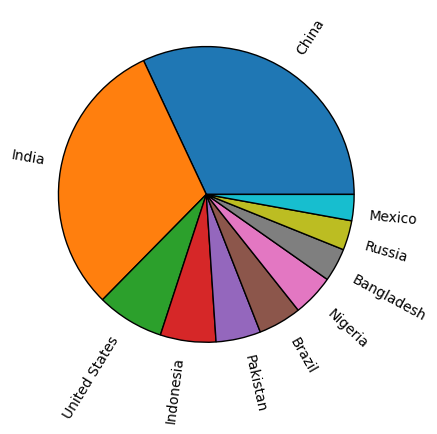

In [97]:
plt.pie(pop["WorldShare"].iloc[:10], labels=pop["Country"].iloc[:10], rotatelabels=True, wedgeprops={"linewidth": 1, "edgecolor": "black"})

None

## Scatterplot

Zweidimensionale Datenpunkte darstellen

Im Gegensatz zum Histogramm benötigen wir hier eine Liste von __Punkten__ statt einzelnen Werten

Benötigt X- und Y-Werte

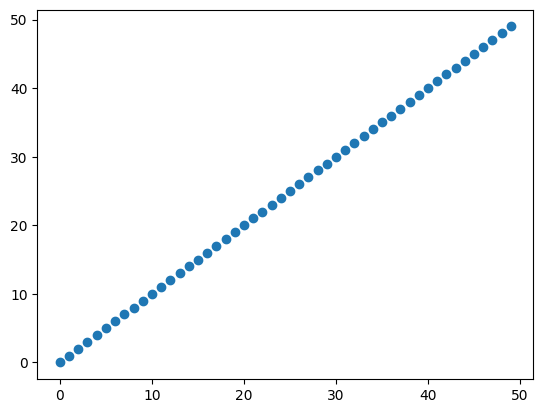

In [98]:
x = np.arange(50)
y = np.arange(50)

plt.scatter(x, y)

None

## Diagramm speichern

figure.savefig(...)

plt.savefig(...)

In [99]:
figure.savefig("Test.png")